In [1]:
#import dependencies
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#Load datasets
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

**Data Exploration**

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
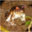

In [5]:
X_train[0]

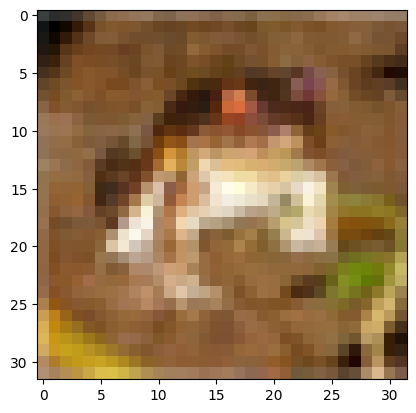

In [6]:
plt.imshow(X_train[0])

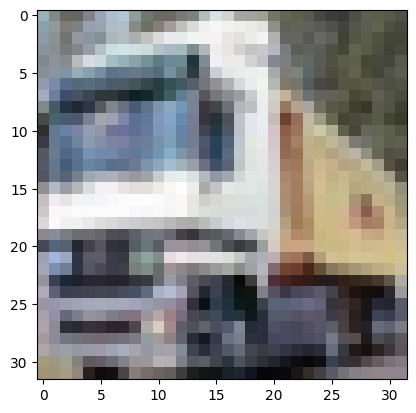

In [7]:
plt.imshow(X_train[1], cmap=plt.cm.binary)

In [8]:
y_train[:5]  # 2_D array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train.shape

(50000, 1)

In [10]:
#reshape Y
# Second dimension we have to flatten out as it is [6]as simple 6 so just give comma
y_train = y_train.reshape(-1,) # -1 indicates keep first dimension as it is i.e 50,000 image samples
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
y_train.shape

(50000,)

In [12]:
classes=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [13]:
classes[9]

'truck'

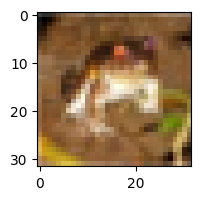

In [14]:
# To display image in smaller size
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [15]:
#shows image and its label
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


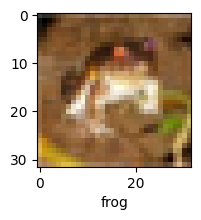

In [16]:
plot_sample(X_train, y_train, 0)

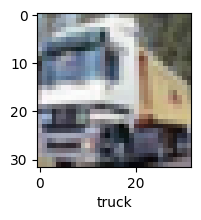

In [17]:
plot_sample(X_train, y_train, 1)

**Data Normalization**

In [18]:
#Divide by 255 (RGB image) to normalized in the range of 0 to 1
X_train = X_train / 255
X_test = X_test / 255

In [19]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [20]:
X_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

Build Simple ANN

In [21]:
# Dense ANN
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)), #input layer
    layers.Dense(3000, activation='relu'), # Hidden layer1
    layers.Dense(1000, activation='relu'), # Hidden layer 2
    layers.Dense(10, activation='sigmoid') #output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [23]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3102 - loss: 1.9300
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4251 - loss: 1.6405
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4569 - loss: 1.5476
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4750 - loss: 1.4893
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4978 - loss: 1.4309


Accuracy is very low around 43% on training samples
Training accuracy 43%

Test accuracy=47%



In [24]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4642 - loss: 1.4730


[1.4749590158462524, 0.46380001306533813]

In [25]:
#classification report
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print("Classification report:\n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification report:
               precision    recall  f1-score   support

           0       0.54      0.55      0.54      1000
           1       0.45      0.79      0.57      1000
           2       0.27      0.60      0.37      1000
           3       0.40      0.25      0.31      1000
           4       0.54      0.22      0.31      1000
           5       0.46      0.29      0.36      1000
           6       0.57      0.46      0.51      1000
           7       0.57      0.52      0.54      1000
           8       0.61      0.61      0.61      1000
           9       0.61      0.36      0.45      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.46     10000
weighted avg       0.50      0.46      0.46     10000



In [26]:
# ANN doesnt give good performance
# Use CNN to improve performance

cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'), # Hidden layer1
    layers.Dense(10, activation='softmax') #output layer
])

In [28]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.3589 - loss: 1.7400
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6012 - loss: 1.1334
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6523 - loss: 0.9925
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6869 - loss: 0.9010
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7175 - loss: 0.8216
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7347 - loss: 0.7654
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7481 - loss: 0.7235
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7676 - loss: 0.6646
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7842 - loss: 0.6236
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7952 - loss: 0.5871


In [30]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7011 - loss: 0.9184


[0.9442267417907715, 0.6934000253677368]

Training accuracy=80%

Testing accuracy=70%

In [31]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

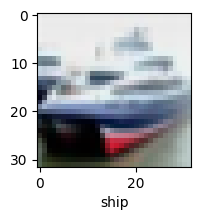

In [32]:
plot_sample(X_test, y_test, 1)

In [33]:
# Use model to predict all test samples
y_pred=cnn.predict(X_test)
y_pred[:5]    # O/p is distribution of 0 and 1 as we uses softmax.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[9.1937509e-05, 7.9050253e-04, 5.9777028e-03, 8.6760259e-01,
        5.9625745e-05, 5.7833768e-02, 3.3548988e-02, 1.2936605e-05,
        3.3909962e-02, 1.7186084e-04],
       [1.0020793e-02, 6.6502020e-02, 2.9624484e-06, 8.5545459e-08,
        1.0213607e-06, 1.2090166e-08, 4.9736570e-09, 5.3801856e-09,
        9.2212188e-01, 1.3512309e-03],
       [1.5847623e-02, 5.8578151e-01, 6.5605324e-03, 6.4891754e-03,
        2.0547936e-04, 1.7680146e-04, 1.6621526e-03, 8.1613666e-04,
        3.6613980e-01, 1.6320804e-02],
       [8.8525039e-01, 9.5039822e-02, 4.3041920e-03, 3.0742121e-05,
        1.6702928e-04, 3.3452224e-08, 5.7937880e-04, 5.7987104e-06,
        1.4599126e-02, 2.3506243e-05],
       [1.0101144e-06, 6.7392546e-07, 2.9443365e-03, 5.0735250e-03,
        6.6427189e-01, 3.9818470e-04, 3.2729596e-01, 2.6745769e-07,
        1.4246315e-05, 1.0423428e-08]], dtype=float32)

In [34]:
np.argmax([5,12,167,2])  # returning index of 167 i.e max element as 2

np.int64(2)

In [35]:
# find out which class has maximum value
y_pred_classes=[np.argmax(element) for element in y_pred]
y_pred_classes[:5]

[np.int64(3), np.int64(8), np.int64(1), np.int64(0), np.int64(4)]

In [36]:
y_test[:5]  #made some errors

array([3, 8, 8, 0, 6], dtype=uint8)

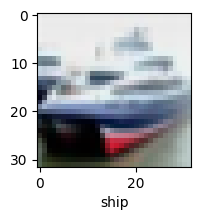

In [37]:
plot_sample(X_test, y_test, 1)

In [39]:
classes[y_pred_classes[1]]

'ship'

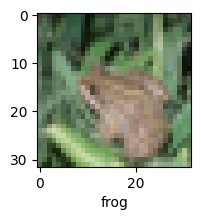

In [41]:
plot_sample(X_test, y_test, 4)

In [42]:
classes[y_pred_classes[4]] #made mistakes

'deer'

In [43]:
print("Classification report:\n", classification_report(y_test, y_pred_classes))

Classification report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      1000
           1       0.81      0.80      0.81      1000
           2       0.57      0.57      0.57      1000
           3       0.59      0.42      0.49      1000
           4       0.56      0.73      0.64      1000
           5       0.69      0.54      0.61      1000
           6       0.67      0.83      0.74      1000
           7       0.73      0.75      0.74      1000
           8       0.84      0.76      0.80      1000
           9       0.76      0.78      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

